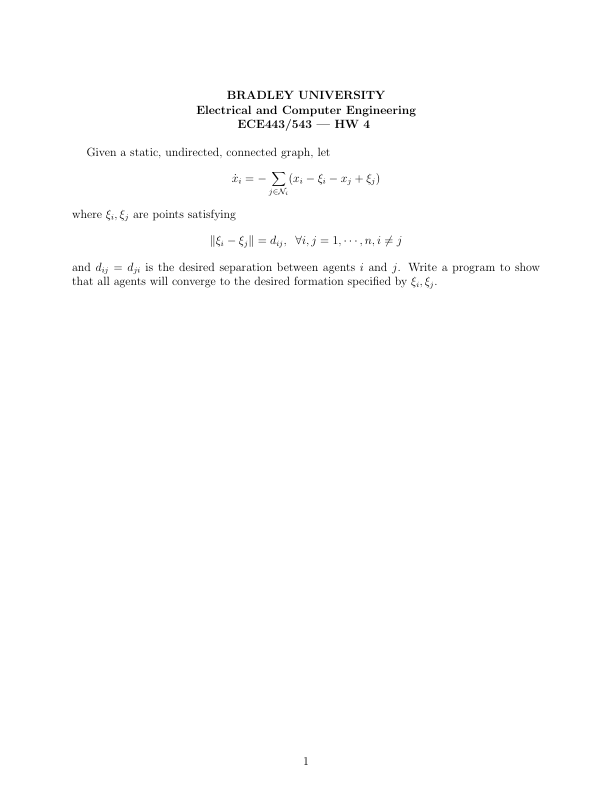

In [1]:
import fitz  # PyMuPDF
from IPython.display import display, Image

def display_pdf_images(pdf_path):
    # Open the PDF file
    pdf_document = fitz.open(pdf_path)
    
    # Display each page as an image
    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        image_bytes = page.get_pixmap().tobytes()
        display(Image(data=image_bytes))

# Call the function with the path to your PDF file
display_pdf_images("hw4.pdf")

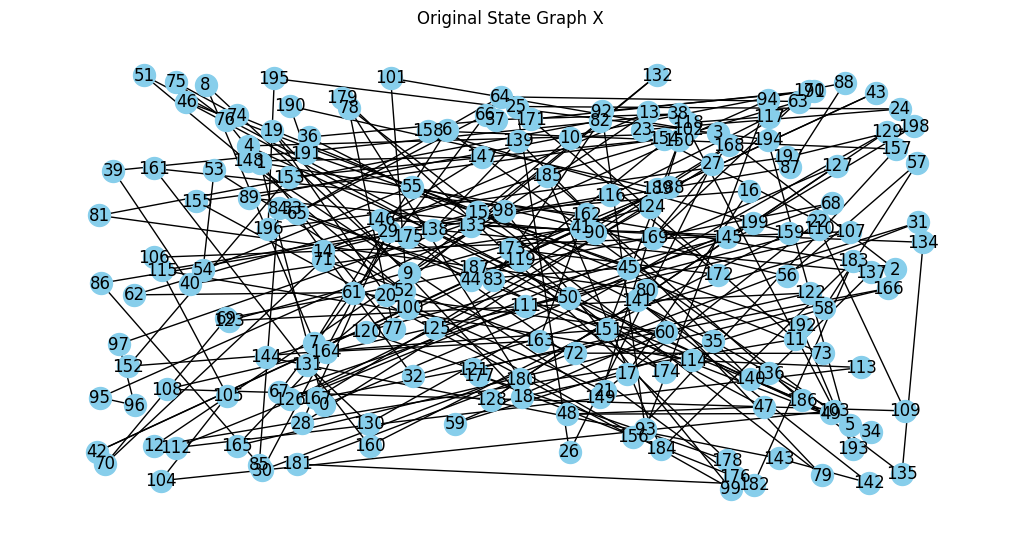

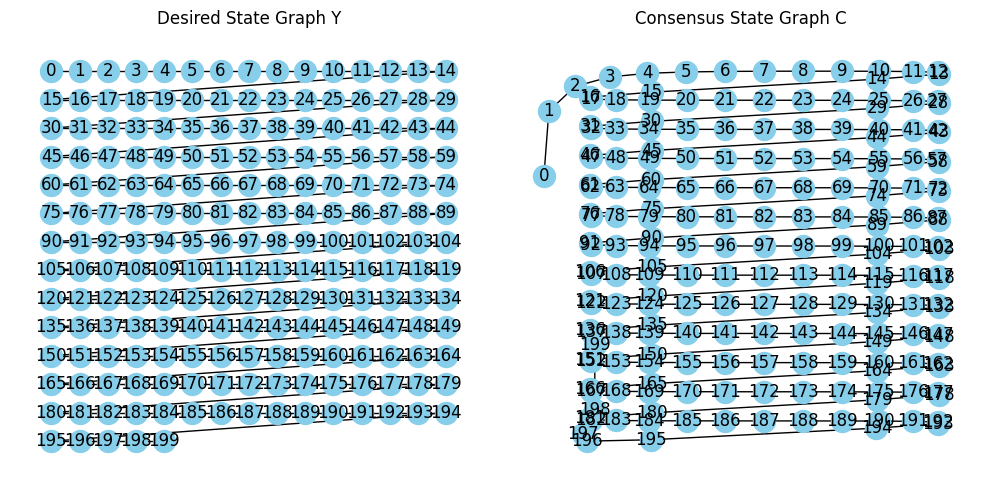

In [68]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def AgentGen(N):
    
    X = nx.Graph()   # generate a undirected graph with N nodes
    
    for i in range(N):   # add nodes in the graph
        x_pos = np.random.rand() * 10  # Random x-coordinate between 0 and 10
        y_pos = np.random.rand() * 10  # Random y-coordinate between 0 and 10
        X.add_node(i, pos=(x_pos, y_pos))
    
    for i in range(N - 1):   # connect the nodes together
        X.add_edge(i, i + 1)
    X.add_edge(N - 1, 0)   # connect last node to first node
    return X
    
def DesiredGen(N, state):
    
    X = nx.Graph()
    for i in range(N):
        X.add_edge(i, (i + 1) % N)

    if state == "Square":
        side_length = int(np.ceil(np.sqrt(N)))  # Calculate side length of the square
        for i in range(side_length):
            for j in range(side_length):
                if i * side_length + j < N:
                    x_pos = j
                    y_pos = -i
                    X.add_node(i * side_length + j, pos=(x_pos, y_pos))
                    
    elif state == "Circle":
        radius = 5  # Radius of the circle
        theta = np.linspace(0, 2*np.pi, N, endpoint=False)
        for i in range(N):
            x_pos = radius * np.cos(theta[i])
            y_pos = radius * np.sin(theta[i])
            X.add_node(i, pos=(x_pos, y_pos))
            
    elif state == "Hexagon":
        side_length = int(np.ceil(np.sqrt(N)))  # Calculate side length of the hexagon
        for i in range(side_length):
            for j in range(side_length):
                if i * side_length + j < N:
                    x_pos = j * np.sqrt(3)
                    y_pos = -i * 1.5
                    if j % 2 == 1:  # Shift every other row
                        y_pos -= 0.75
                    X.add_node(i * side_length + j, pos=(x_pos, y_pos))
 
    elif state == "Rectangle":
        rows = int(np.ceil(N / 3))  # Number of rows in the rectangle
        for i in range(rows):
            for j in range(3):
                if i * 3 + j < N:
                    x_pos = j * 3
                    y_pos = -i
                    X.add_node(i * 3 + j, pos=(x_pos, y_pos))
                    
    # Remove edge between the first and last nodes
    X.remove_edge(0, N - 1)
    
    # Add placeholder nodes if needed
    while X.number_of_nodes() < N:
        X.add_node(X.number_of_nodes(), pos=(0, 0))
        
    return X

def Consensus(X, E_i, E_j, iter_num):
  
    for _ in range(iter_num):
        for i in range(X.number_of_nodes()):
            x_sum = 0
            y_sum = 0
            neighbor_count = 0
            for neighbor in X.neighbors(i):
                x_sum += X.nodes[neighbor]['pos'][0]
                y_sum += X.nodes[neighbor]['pos'][1]
                neighbor_count += 1
            
            # Consensus update for x-coordinate
            x_pos = X.nodes[i]['pos'][0]
            x_pos_hat = (x_sum + E_i[i][0]) / (neighbor_count +1)
            
            # Consensus update for y-coordinate
            y_pos = X.nodes[i]['pos'][1]
            y_pos_hat = (y_sum + E_i[i][1]) / (neighbor_count +1)
            
            # Update node position
            x_pos -= (x_pos - x_pos_hat)
            y_pos -= (y_pos - y_pos_hat) 
            
            
            X.nodes[i]['pos'] = (x_pos, y_pos)   #update the x and y at the same time

     
    X.remove_edge(0, X.number_of_nodes() - 1)
    return X

def plot_graph(graph, ax, title):
     # Get node positions
    graph_pos = nx.get_node_attributes(graph, 'pos')
    nx.draw(graph, pos = graph_pos, with_labels=True, node_size=250, node_color='skyblue', ax=ax)
    ax.set_title(title)

def main():

    agents = 200
    
    # lets create E_i and E_j
    Y = DesiredGen(agents, "Square")
    # Let's create E_i and E_j based on the positions of nodes in graph Y
    E_i = []
    E_j = []

    # Extract positions of nodes in Y
    for _, pos in Y.nodes(data='pos'):
        E_i.append(pos)

    # Assuming E_j = E_i
    E_j = E_i.copy()
    
    # Generate Random Agents
    X = AgentGen(agents)

    # plot the original state
    plt.figure(figsize=(10, 5))
    X_pos = nx.get_node_attributes(X, 'pos')
    nx.draw(X ,pos = X_pos,with_labels=True, node_size=250, node_color='skyblue')
    plt.title('Original State Graph X')
    plt.show()
    
    C = Consensus(X, E_i, E_j, 10000)

    # plot desired state and consensus state
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))  
    plot_graph(Y, axes[0], 'Desired State Graph Y')
    plot_graph(C, axes[1], 'Consensus State Graph C')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()